In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
df=pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
import seaborn as sb

<AxesSubplot:xlabel='target', ylabel='count'>

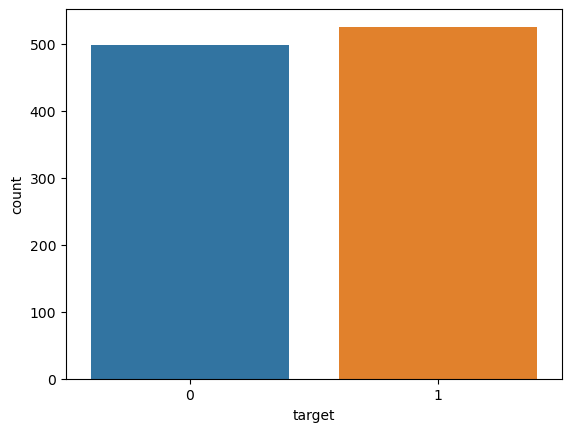

In [5]:
sb.countplot(data=df,x='target')

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

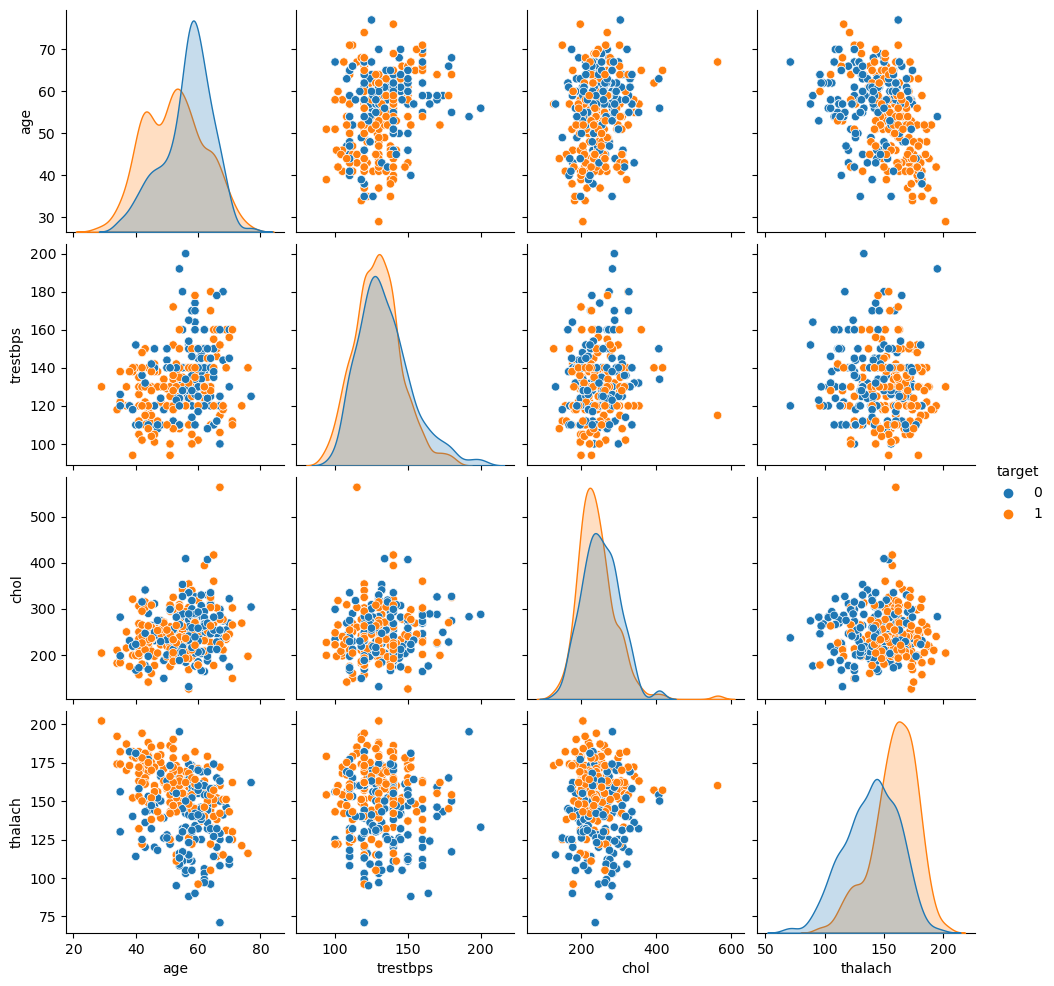

In [7]:
sb.pairplot(data=df[['age','trestbps', 'chol','thalach','target']],hue='target')

In [8]:
import matplotlib.pyplot as  plt

<AxesSubplot:>

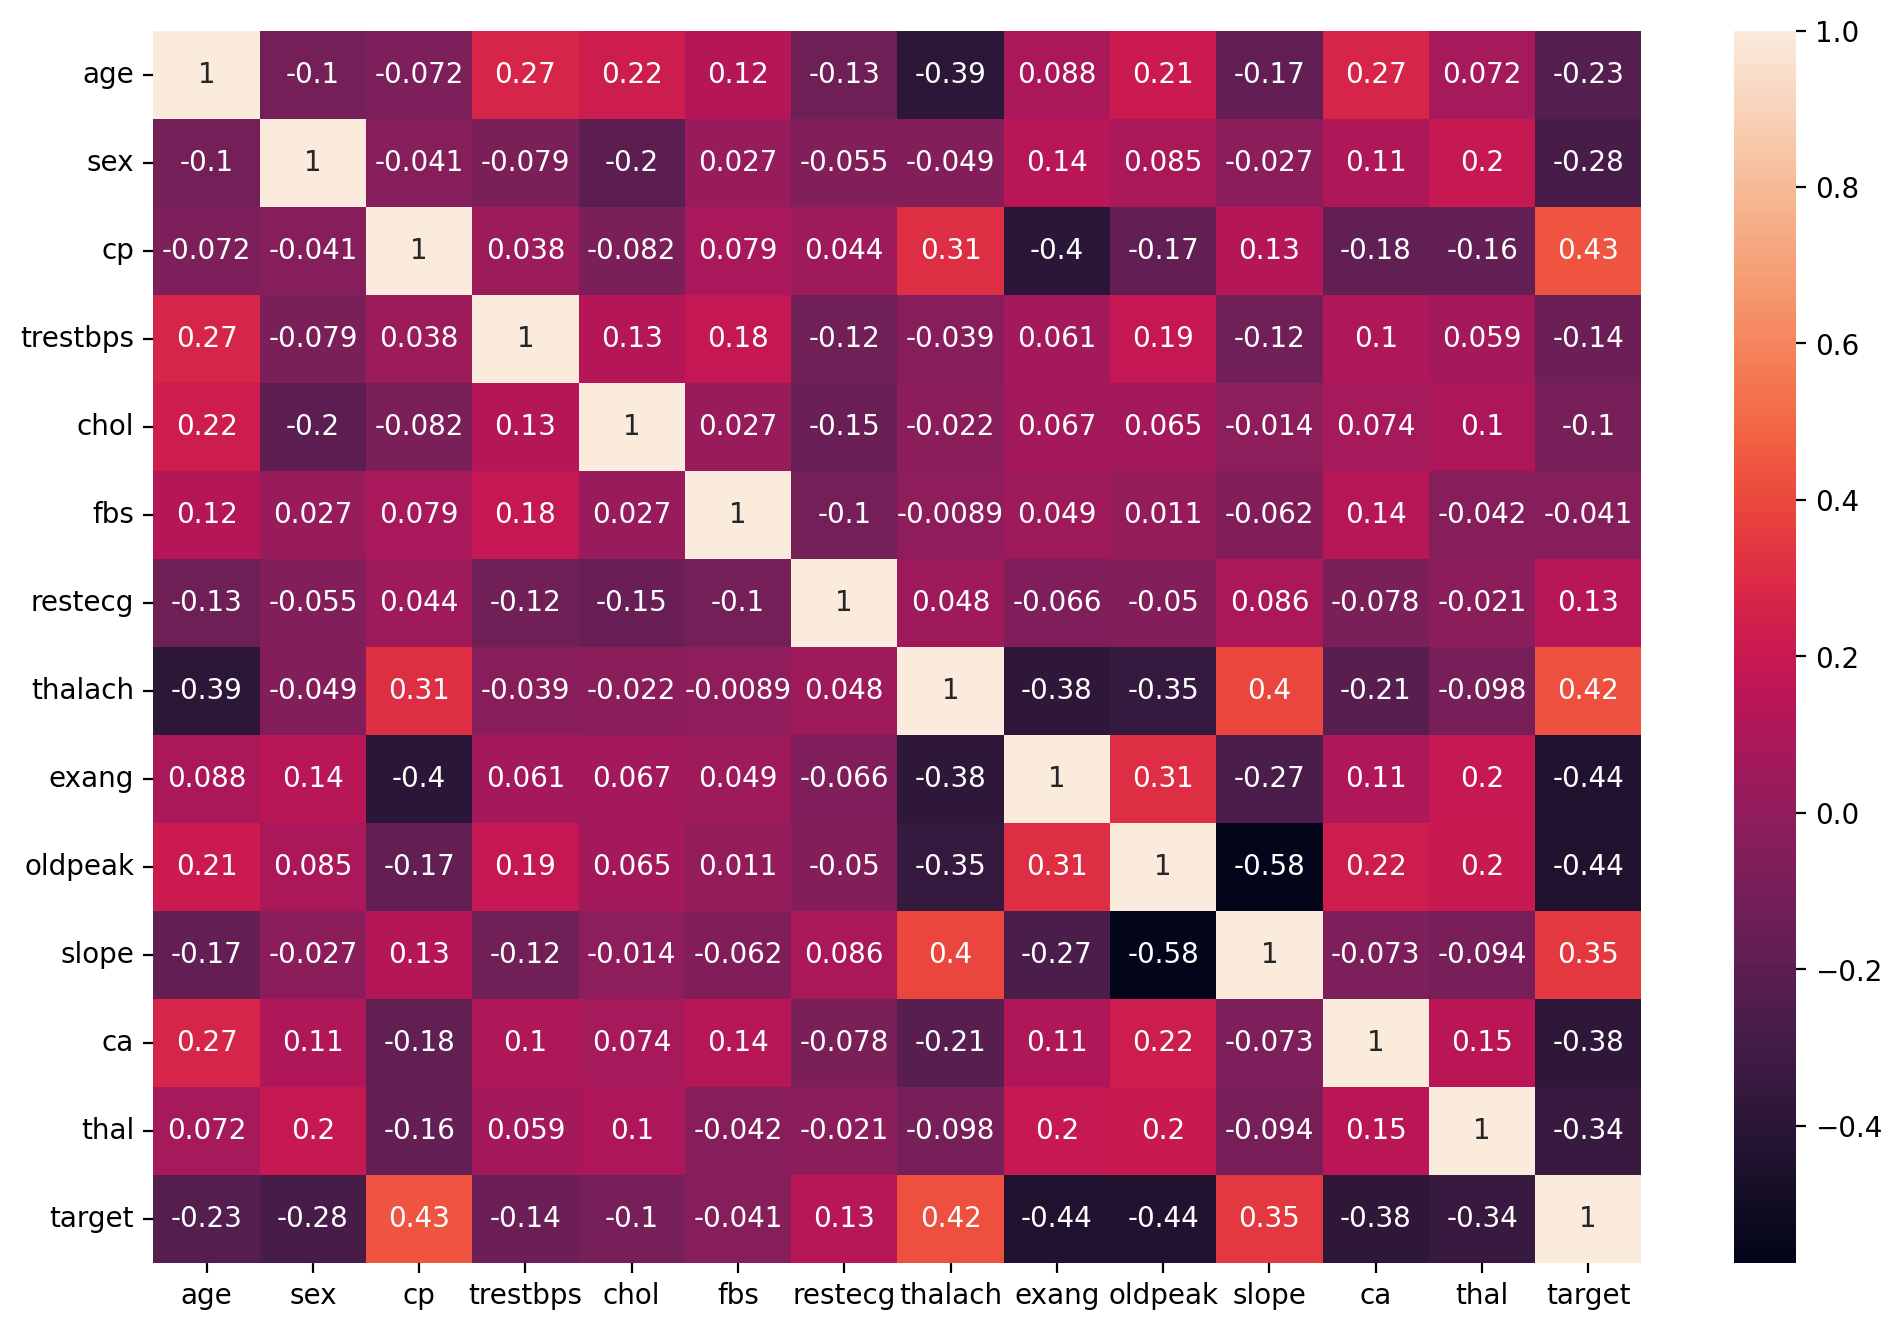

In [9]:
plt.figure(figsize=(12,8),dpi=200)
sb.heatmap(df.corr(),annot=True)

In [10]:
X=df.drop('target',axis=1)

In [11]:
y=df['target']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [14]:
scaler=StandardScaler()

In [15]:
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.fit_transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegressionCV

In [17]:
log_model=LogisticRegressionCV()

In [18]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [19]:
log_model.C_

array([0.00599484])

In [20]:
log_model.coef_

array([[-0.10372194, -0.24904709,  0.36834611, -0.11024913, -0.05198088,
        -0.0512537 ,  0.08945095,  0.23442272, -0.26553426, -0.24379936,
         0.20057239, -0.28607581, -0.25053636]])

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [22]:
y_pred=log_model.predict(scaled_X_test)

In [23]:
confusion_matrix(y_test,y_pred)

array([[ 97,  31],
       [ 10, 119]])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


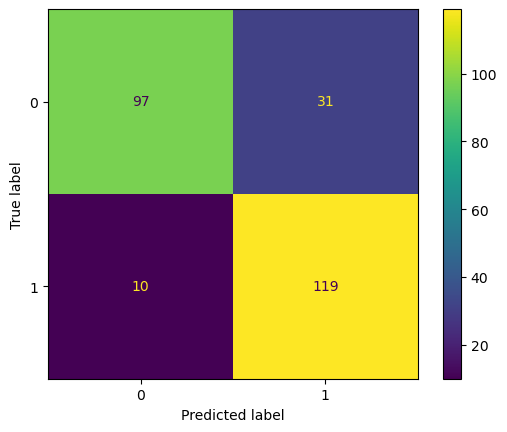

In [24]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83       128
           1       0.79      0.92      0.85       129

    accuracy                           0.84       257
   macro avg       0.85      0.84      0.84       257
weighted avg       0.85      0.84      0.84       257



In [26]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


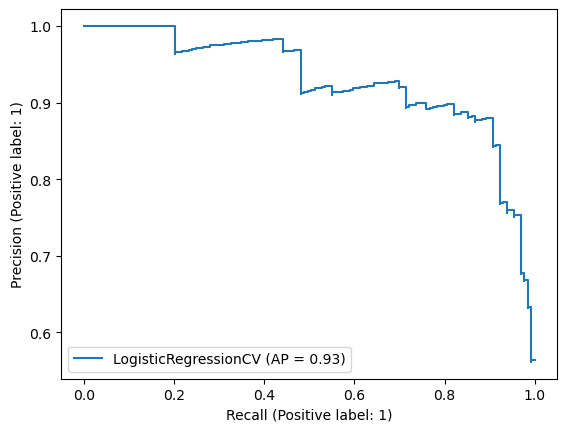

In [27]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


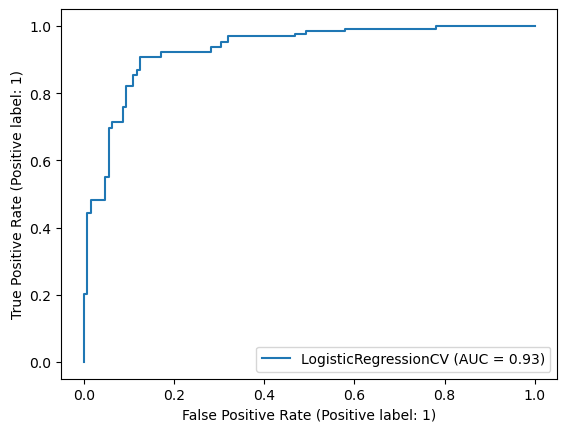

In [28]:
plot_roc_curve(log_model,scaled_X_test,y_test)

In [29]:
# print(classification_report(y_test,y_pred))

In [30]:
patient=[[54.,1.,0.,122.,286.,0.,0.,116.,1.,3.2,1.,2.,2.]]


In [31]:
log_model.predict(patient)

array([0])

In [32]:
log_model.predict_proba(patient)

array([[9.99855501e-01, 1.44498828e-04]])